# Notes on the data generation

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize

from ipywidgets import widgets
from IPython.display import display

import numpy as np
import seaborn as sns

In [4]:
%run environment.py

I've been having a bit of trouble with the means for the geometric Brownian motion that I'm generating here. A couple of thing to note here:
1. The variance scales with time _exponentially_. So good estimates from the data will be difficult to come by at large times

2. I seem to see an underestimate of the mean with the naive estimator. I think this is because, essentially, low valued runs are common, while exponentially higher ones are rare.

# Checking across sigma

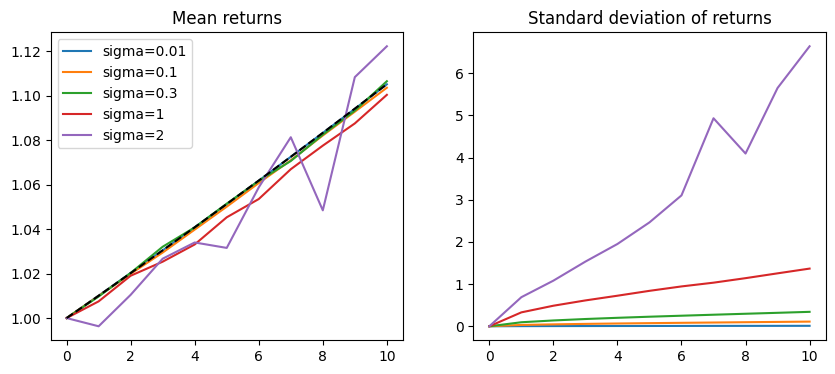

In [70]:
dt = 0.1
N = 10
reps = 10000

sigmas = [0.01, 0.1, 0.3, 1, 2]

figsize(10,4)
plt.subplots(1,2)
for sigma in sigmas:
    data = geometricBrownianMotion(mu=0.1, sigma=sigma, dt=dt, N=N, reps=reps)

    plt.subplot(1,2,1)
    plt.title('Mean returns')
    plt.plot( np.arange(N+1), data.mean(0), label=f'sigma={sigma}')
    plt.subplot(1,2,2)
    plt.title('Standard deviation of returns')
    plt.plot( np.arange(N+1), data.std(0), label=f'sigma={sigma}')
    
plt.subplot(1,2,1)
plt.plot( np.arange(N+1), np.exp(0.1*dt* np.arange(N+1)), '--k')
plt.legend()

The mean follows an expected trajectory, but note that the variance of the samples scales very unfavorably with sigma and with time.

This is due to the heavy-tailed nature of the geometric brownian motion.

## Sanity check

Taking log, we should get normal data

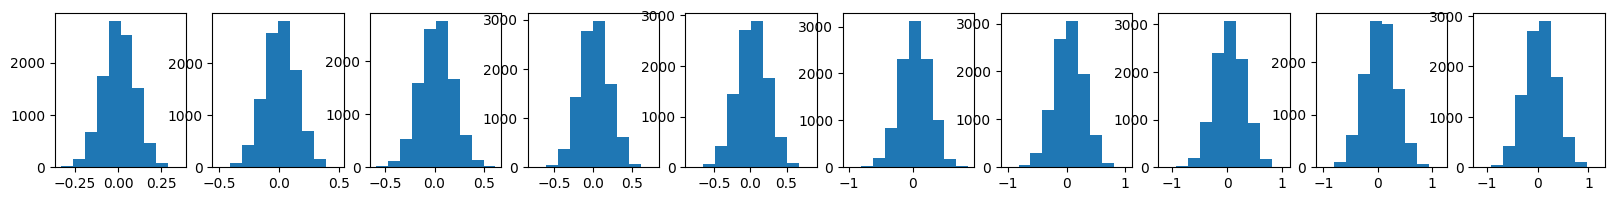

In [180]:
mu = 0.1
sigma=0.3
data = geometricBrownianMotion(mu, sigma, dt=0.1, N=10, reps=10000)

figsize(20, 2)
plt.subplots(1, 10)
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.hist( np.log(data[:,i]))

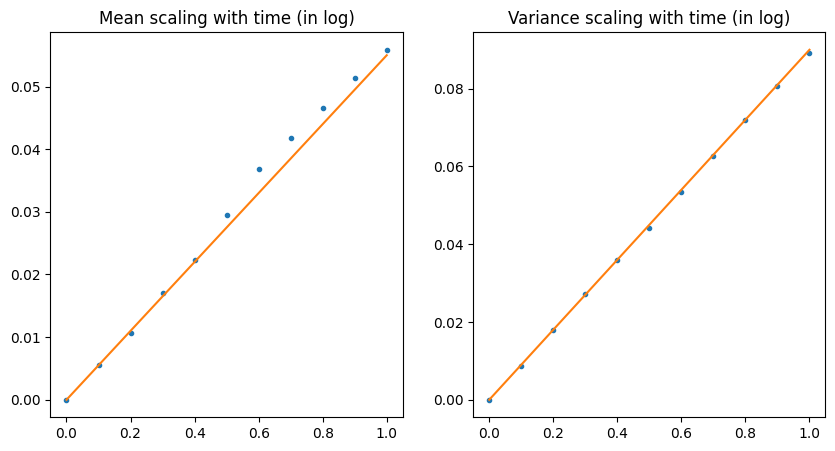

In [181]:
times = np.linspace(0, 1)

figsize(10, 5)
plt.subplots(1,2)
plt.subplot(1, 2, 1)
plt.title('Mean scaling with time (in log)')
plt.plot(0.1*np.arange(11), np.log(data).mean(0), '.' )
plt.plot(times, (mu - 0.5*sigma**2)*times)

plt.subplot(1,2,2)
plt.title('Variance scaling with time (in log)')
plt.plot(0.1*np.arange(11), np.log(data).var(0), '.' )
plt.plot(times, sigma**2 * times)


#### QQ plots to test the empirical distributions that we get out

Text(0.5, 0.98, 'QQ plots for log data vs normal distribution')

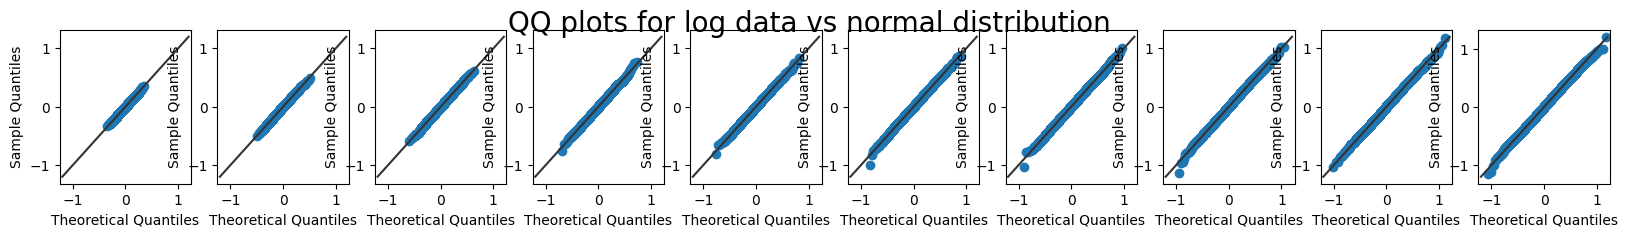

In [182]:
import statsmodels.api as sm
from scipy.stats import norm

figsize(20, 2)
plt.subplots(1, 10)

for i in range(1, 11):
    ax=plt.subplot(1, 10, i)
    groundTruthMu = (mu - 0.5*sigma**2)*0.1*i
    groundTruthSigma = sigma*(0.1*i)**0.5
    
    sm.qqplot(np.log(data[:,i]), dist=norm(groundTruthMu, groundTruthSigma), ax=ax )  
    ax.plot( np.linspace(-1.2, 1.2), np.linspace(-1.2,1.2), '0.2')
plt.suptitle("QQ plots for log data vs normal distribution", fontsize=20)

Ok, everything looks good here.

Text(0.5, 0.98, 'QQ plots for data vs lognormal distribution')

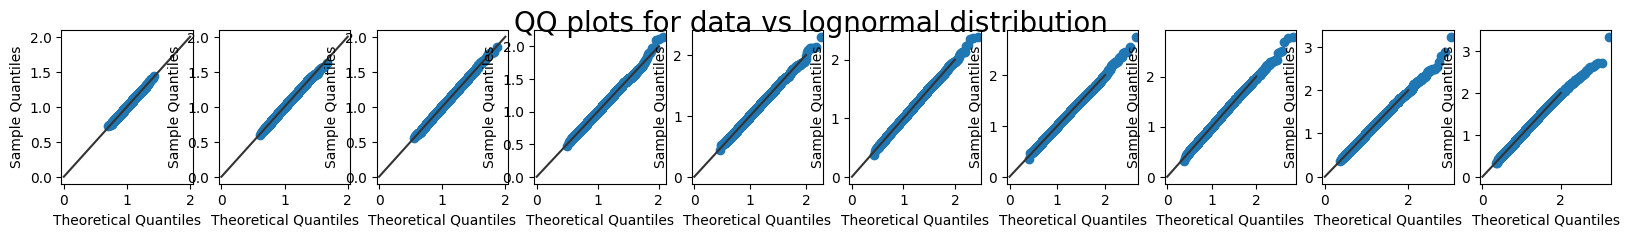

In [184]:
import statsmodels.api as sm
from scipy.stats import lognorm

figsize(20, 2)
plt.subplots(1, 10)

for i in range(1, 11):
    ax = plt.subplot(1, 10, i)
    groundTruthScale = np.exp( (mu - 0.5*sigma**2)*0.1*i )
    groundTruthS = sigma*(0.1*i)**0.5
    
    sm.qqplot(data[:,i], dist=lognorm(groundTruthS, scale=groundTruthScale ), ax=ax ) 
    ax.plot( np.linspace(0, 2), np.linspace(0,2), '0.2')
    
plt.suptitle("QQ plots for data vs lognormal distribution", fontsize=20)

Again, this seems to confirm that the data generation looks good. 

(Note that larger sigma values more effectively explore results close to zero. This is the equivalent of exploring points close to $-\infty$ on the normal qq plot)

Text(0.5, 0.98, 'QQ plots for log data vs normal distribution- large variance')

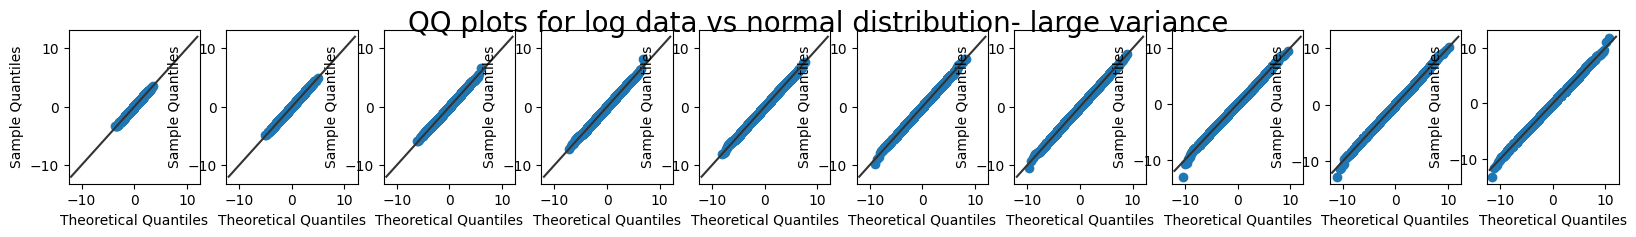

In [191]:
mu = 4.
sigma = 3.
data = geometricBrownianMotion(mu, sigma, dt=0.1, N=10, reps=10000)


figsize(20, 2)
plt.subplots(1, 10)

for i in range(1, 11):
    ax=plt.subplot(1, 10, i)
    groundTruthMu = (mu - 0.5*sigma**2)*0.1*i
    groundTruthSigma = sigma*(0.1*i)**0.5
    
    sm.qqplot(np.log(data[:,i]), dist=norm(groundTruthMu, groundTruthSigma), ax=ax )  
    ax.plot( np.linspace(-12, 12), np.linspace(-12, 12), '0.2')
plt.suptitle("QQ plots for log data vs normal distribution- large variance", fontsize=20)

Text(0.5, 0.98, 'QQ plots for data vs lognormal distribution - large variance')

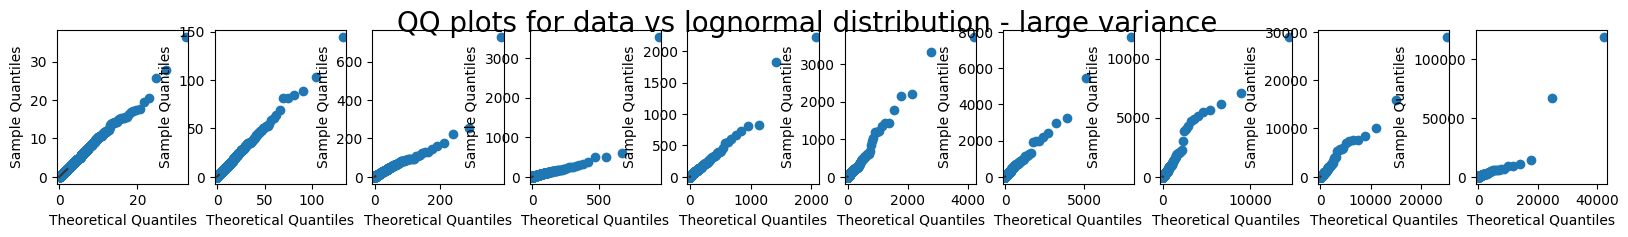

In [192]:
figsize(20, 2)
plt.subplots(1, 10)

for i in range(1, 11):
    ax = plt.subplot(1, 10, i)
    groundTruthScale = np.exp( (mu - 0.5*sigma**2)*0.1*i )
    groundTruthS = sigma*(0.1*i)**0.5
    
    sm.qqplot(data[:,i], dist=lognorm(groundTruthS, scale=groundTruthScale ), ax=ax ) 
    ax.plot( np.linspace(0, 2), np.linspace(0,2), '0.2')
plt.suptitle("QQ plots for data vs lognormal distribution - large variance", fontsize=20)

#### This illustrates the difficulty due to high variance 

Note that the log data plots behave just fine, while the log normal plots seem to see strange beahvior in the tails. This is due to the exponential amplification for the small number of very large data points.